# Linear Regression using Scikit learn

In [ ]:
from urllib.request import urlretrieve

In [ ]:
#URL for dataset
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
#loading to csv file
urlretrieve(url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c5dc1736200>)

In [ ]:
import pandas as pd

In [ ]:
#creating DataFrame
mdf=pd.read_csv('medical.csv')

In [ ]:
mdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#see statistical values
mdf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Exploratory Analysis and Visualization: Distributions


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# changing default settings
sns.set_style("darkgrid")
matplotlib.rcParams['figure.figsize']==(10,6)
matplotlib.rcParams['figure.facecolor']=='#00000000'
matplotlib.rcParams['font.size']=14

###Age

In [ ]:
mdf.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
#drawing interactive histogram using plotly
fig=px.histogram(mdf,
                 x='age',
                 marginal="box",
                 nbins=47,
                 title="Age Distribution")
fig.update_layout(bargap=0.1)
fig.show()

### BMI

In [ ]:
#drawing interactive histogram using plotly
fig=px.histogram(mdf,
                 x='bmi',
                 color_discrete_sequence=['red'],
                 marginal="box",
                 nbins=47,
                 title="BMI Distribution")
fig.update_layout(bargap=0.1)
fig.show()

###Charges

In [ ]:
#drawing interactive histogram using plotly
fig=px.histogram(mdf,
                 x='charges',
                 color='smoker',
                 color_discrete_sequence=['green','grey'],
                 marginal="box",
                 nbins=47,
                 title="Charges Distribution")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
##lets check smoker counts
mdf.smoker.value_counts()

,count
smoker,
no,1064
yes,274


### Smoker

In [ ]:
px.histogram(mdf,
             x='smoker',
             color='sex',
             title='Smoker Distribution')

###Sex

In [ ]:
px.histogram(mdf,
             x='sex',
             color='sex',
             title='Sex Distribution')

###Region

In [ ]:
px.histogram(mdf,
             x='region',
             title='Region Distribution')

### Children

In [ ]:
px.histogram(mdf,
             x='children',
             color='sex',
             title='Children Distribution')

## Finding relations

### Age and Charges

In [ ]:
fig=px.scatter(mdf,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.7,
               hover_data=['sex'],
               title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges

In [ ]:
fig=px.scatter(mdf,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.7,
               hover_data=['sex'],
               title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

### Children and Charges

In [ ]:
px.scatter(mdf,
          x='children',
          y='charges',
          color='smoker',
          opacity=0.7,
          hover_data=['sex'],
          title='Children vs Charges')


In [ ]:
#finding realtions in above plot is difficult
#lets use violin plot
px.violin(mdf,
          x='children',
          y='charges',
          title='Children vs Charges')


##Finding Correlation

### Charges and Age

In [ ]:
mdf.charges.corr(mdf.age)

0.2990081933306476

### Charges and BMI

In [ ]:
mdf.charges.corr(mdf.bmi)

0.19834096883362895

### Charges and Children

In [ ]:
mdf.charges.corr(mdf.children)

0.06799822684790478

### Charges and smoker

In [ ]:
#for categorical data, we need to convert it into numerical data
mdf.charges.corr(mdf.smoker.map({'yes':1,'no':0}))

0.787251430498478

### Correlation for ALL

In [ ]:
# prompt: find correlation for only numeric columns

numeric_cols = ['age', 'bmi', 'children', 'charges']
mdf[numeric_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


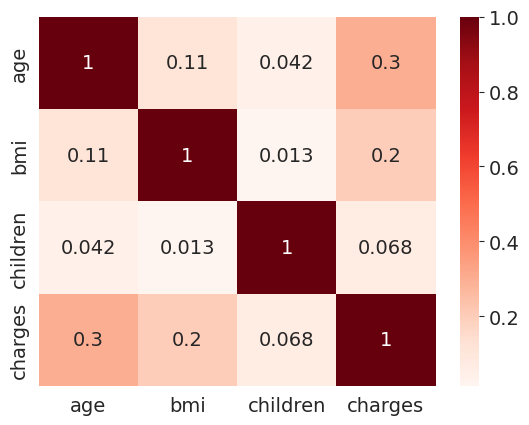

In [ ]:
#corr is visualized using heatmap
sns.heatmap(mdf[numeric_cols].corr(), annot=True, cmap='Reds');